# Below shows how to load PLA data to a spatial Anndata object

In [35]:
#Load library
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

In [2]:
sc.logging.print_header()

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/p

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
#for spatial_RNA data load, just apply sc.read_visium 
#read_visium data 
adata_rna = sc.read_visium('/Users/junjie/Desktop/outs')
adata_rna.var_names_make_unique()

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
#check structure 
adata_rna.obs

,in_tissue,array_row,array_col
AAACAAGTATCTCCCA-1,1,50,102
AAACACCAATAACTGC-1,1,59,19
AAACAGAGCGACTCCT-1,1,14,94
AAACAGCTTTCAGAAG-1,1,43,9
AAACAGGGTCTATATT-1,1,47,13
...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77
TTGTTTCACATCCAGG-1,1,58,42
TTGTTTCATTAGTCTA-1,1,60,30
TTGTTTCCATACAACT-1,1,45,27


In [5]:
#important factor here for helping construct adata_pla
adata_rna.uns

OrderedDict([('spatial',
              {'A1_Human_tonsil_Proxseq_new': {'images': {'hires': array([[[0., 0., 0.],
                         [0., 0., 0.],
                         [0., 0., 0.],
                         ...,
                         [0., 0., 0.],
                         [0., 0., 0.],
                         [0., 0., 0.]],
                 
                        [[0., 0., 0.],
                         [0., 0., 0.],
                         [0., 0., 0.],
                         ...,
                         [0., 0., 0.],
                         [0., 0., 0.],
                         [0., 0., 0.]],
                 
                        [[0., 0., 0.],
                         [0., 0., 0.],
                         [0., 0., 0.],
                         ...,
                         [0., 0., 0.],
                         [0., 0., 0.],
                         [0., 0., 0.]],
                 
                        ...,
                 
                        [[0.,

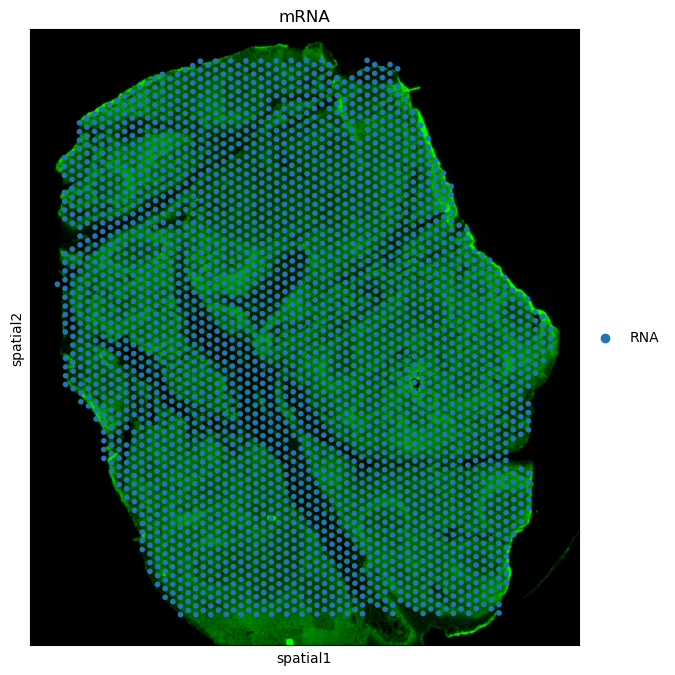

In [40]:
adata_rna.obs['mRNA']= 'RNA'
sc.pl.spatial(adata_rna, color = 'mRNA')

In [8]:
#read PLA data 
pla_a = pd.read_csv('/Users/junjie/Desktop/A1_count_matrix.txt.gz', sep="\t",index_col=0)

In [23]:
#read tissue barcode 
tissue_barcode = pd.read_csv('/Users/junjie/Desktop/outs/spatial/tissue_positions.csv')

In [24]:
pla_a.head()

,CGGGTTCGGCACGTAT-1,TCGCCCACTGCGAGAG-1,GAACTGTGGAGAGACA-1,AAGGGACAGATTCTGT-1,CTATTTGGTTACGGAT-1,CCACGTAAATTAGACT-1,GCACTGCCTACCTTTA-1,CAATGAGGTTCGACTA-1,TACGTGCAAGGTTCCT-1,GGCCCTCACCCACTTA-1,...,ATCCCATCCACAGCGC-1,GTTTCCTGGAGGGTGA-1,TTCGCACTCGCGTGCT-1,CAGCTTAGTAGGTAGC-1,TGCCGTTCTTAATCGG-1,CTGAAAGAGATCCGAC-1,AGCTGAAGTAAACCAA-1,GGGATGGTCGTAACCG-1,ATTCATATACTGTCCA-1,CCCTGGCTGTTCCTTC-1
PLA_pair,,,,,,,,,,,,,,,,,,,,,
CD147:CD147,11,0,0,2,1,4,1,4,5,0,...,0,0,0,0,0,0,0,0,0,0
CD147:CD19,3,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CD147:CD20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CD147:CD21,1,0,1,0,0,0,9,6,2,1,...,0,0,0,0,0,0,0,0,0,0
CD147:CD23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
tissue_barcode = tissue_barcode.set_index('barcode')

In [28]:
#keep only PLA spot barcode 
tissue_barcode = tissue_barcode.loc[pla_a.transpose().index,:]

In [30]:
#construct pla anndata object
adata_pla = sc.AnnData(pla_a.transpose().to_numpy(), obsm={'spatial': tissue_barcode[['pxl_col_in_fullres','pxl_row_in_fullres']].to_numpy()}, obs=tissue_barcode[['in_tissue','array_row','array_col']])

In [34]:
#rename var name
adata_pla.var.index = pla_a.index

In [36]:
#read image 
image = mpimg.imread('/Users/junjie/Desktop/outs/spatial/tissue_hires_image.png')

In [37]:
#copy the uns parameter from adata_rna anndata
spatial_key = "spatial"
library_id = "A1_human_tonsil_PLA"
adata_pla.uns[spatial_key] = {library_id: {}}
adata_pla.uns[spatial_key][library_id]["images"] = {}
adata_pla.uns[spatial_key][library_id]["images"] = {"hires": image}
adata_pla.uns[spatial_key][library_id]["scalefactors"] = {'tissue_hires_scalef': 0.7358352,'tissue_lowres_scalef': 0.22075056,
                                                      'fiducial_diameter_fullres': 32.33981,'spot_diameter_fullres': 20.019881999999996}

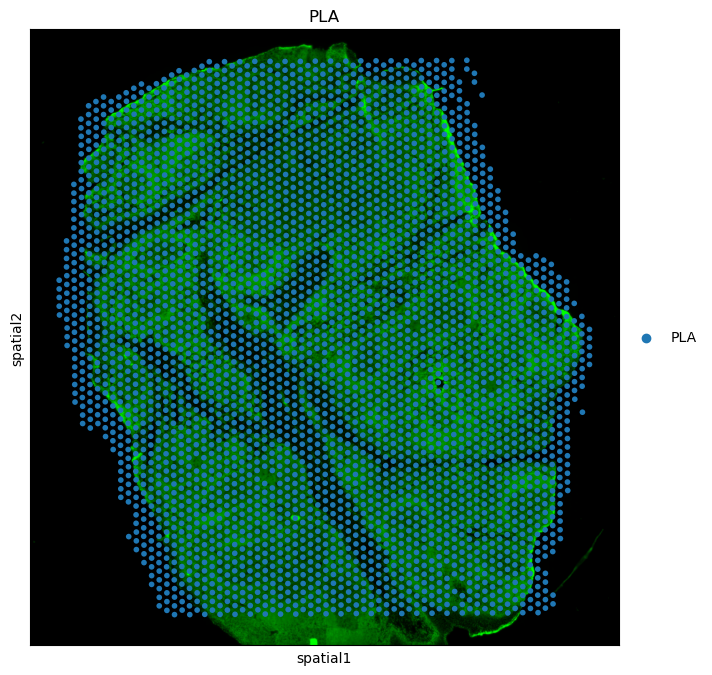

In [39]:
#plot it and you can get similar result as RNA 
adata_pla.obs['PLA'] = 'PLA'
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata_pla, color = 'PLA')